# Chapter2

## 习题 2-1

### About thinkstats.py

#### Trim

对数据进行修正、微调

In [2]:
def Trim(t, p=0.01):
    """Trims the largest and smallest elements of t.

    Args:
        t: sequence of numbers
        p: fraction of values to trim off each end

    Returns:
        sequence of values
    """
    n = int(p * len(t))
    t = sorted(t)[n:-n] # 从第 n 个到倒数第 n 个，如果 n=1，则去掉了首尾（最大和最小值）
    return t

如果 p = 0.01，意味着 100 个数据以内 t 为空，100 个数据以上时，会剔除掉首尾的数字（100-200，剔除首尾各 1 个；200-300 剔除首尾各 2 个；以此类推）

In [19]:
t = [10,20,30,25,15,11,12,13,14,15,16,17,18,22,23,2,9]

In [24]:
n = int(0.1*len(t))
n

1

In [22]:
sorted(t)

[2, 9, 10, 11, 12, 13, 14, 15, 15, 16, 17, 18, 20, 22, 23, 25, 30]

In [23]:
_[1:-1]

[9, 10, 11, 12, 13, 14, 15, 15, 16, 17, 18, 20, 22, 23, 25]

#### Jitter

增加一个均匀随机变量对数据进行抖动

In [3]:
import random

def Jitter(values, jitter=0.5):
    """Jitters the values by adding a uniform variate in (-jitter, jitter)."""
    return [x + random.uniform(-jitter, jitter) for x in values]

In [29]:
random.uniform(-0.5, 0.5)

-0.29384005460596685

#### Var

计算方差，平均值参数可以为空。

In [4]:
def Mean(t):
    """Computes the mean of a sequence of numbers.

    Args:
        t: sequence of numbers

    Returns:
        float
    """
    return float(sum(t)) / len(t)

def Var(t, mu=None):
    """Computes the variance of a sequence of numbers.

    Args:
        t: sequence of numbers
        mu: value around which to compute the variance; by default,
            computes the mean.

    Returns:
        float
    """
    if mu is None:
        mu = Mean(t) # 如果用户没有输入 mu？ 

    # compute the squared deviations and return their mean.
    dev2 = [(x - mu)**2 for x in t]
    var = Mean(dev2)
    return var

In [31]:
t

[10, 20, 30, 25, 15, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 2, 9]

In [35]:
Mean(t)

16.0

In [34]:
Var(t)

42.35294117647059

In [36]:
Var(t,16)

42.35294117647059

### Pumpkin

In [1]:
df = [1,1,1,3,3,591]

In [5]:
Mean(df)

100.0

In [7]:
# 方差

Var(df)

48217.0

In [11]:
# 标准差

import numpy as np
np.sqrt(Var(df))

219.58369702689677

In [12]:
def Pumpkin(t):
    import numpy as np
    return Mean(t), Var(t), np.sqrt(Var(t))

In [13]:
Pumpkin(df)

(100.0, 48217.0, 219.58369702689677)

## 习题 2-2

In [52]:
import first2

In [53]:
first2.Summarize('../Chapter1/')

Number of first babies 4413
Number of others 4735
Mean gestation in weeks:
First babies 38.6009517335
Others 38.5229144667
Var gestation in weeks:
First babies 2.79158506982
Others 2.61557611068
Difference in days 0.546260867443


## 习题 2-3

In [1]:
import Pmf

In [2]:
hist = Pmf.MakeHistFromList([1,2,2,3,5])

In [3]:
print hist

In [7]:
hist.Freq(2)

2

In [8]:
hist.Freq(4)

0

In [10]:
hist.Values()

[1, 2, 3, 5]

In [11]:
for val in sorted(hist.Values()):
    print val, hist.Freq(val)

1 1
2 2
3 1
5 1


### Mode 众数

In [67]:
def Mode(x):
    b = {}
    for i in X:
        if i in b.keys():
            b[i] += 1
        else:
            b[i] = 1
    c = sorted(b.items(), key = lambda x:x[1], reverse=True)
    print c
    print c[0][0], c[0][1]

In [68]:
X = [1,2,2,3,5]

In [69]:
Mode(X)

[(2, 2), (1, 1), (3, 1), (5, 1)]
2 2


In [82]:
def Mode2(x):
    b = {}
    arr = dict((i, x.count(i)) for i in x) # times of each value
    return max(arr.values())

In [83]:
Mode2(X)

2

In [109]:
def Mode20(x):
    b = {}
    arr = dict((i, x.count(i)) for i in x) # times of each value
    return max(arr.values()), sorted(arr.items(), key=lambda x:x[1], reverse=True) # sort by arr.item[1], not [0]

In [110]:
Mode20(X)

(2, [(2, 2), (1, 1), (3, 1), (5, 1)])

In [107]:
arr = dict((i, X.count(i)) for i in X)
arr

{1: 1, 2: 2, 3: 1, 5: 1}

In [108]:
sorted(arr),sorted(arr.keys())

([1, 2, 3, 5], [1, 2, 3, 5])

In [99]:
sorted(arr.values(), reverse=True)

[2, 1, 1, 1]

In [100]:
sorted(arr.items(), reverse=True)

[(5, 1), (3, 1), (2, 2), (1, 1)]

In [106]:
sorted(arr.items(), key=None,reverse=True)

[(5, 1), (3, 1), (2, 2), (1, 1)]

In [102]:
sorted(arr.items(), key=lambda x:x[1],reverse=True)

[(2, 2), (1, 1), (3, 1), (5, 1)]

## 2.5 绘制直方图

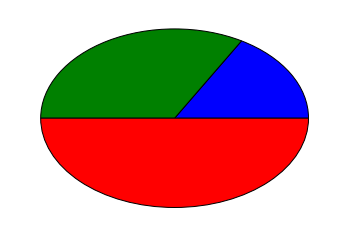

In [3]:
import matplotlib.pyplot as pyplot
pyplot.pie([1,2,3])
pyplot.show()

([<matplotlib.patches.Wedge at 0x7f5554a68c50>,
  <matplotlib.text.Text at 0x7f55549f7d10>])

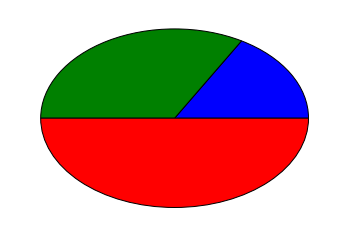

In [2]:
#import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
plt.pie([1,2,3]);
#pyplot.show()